Confusion Matrix:
[[71  4]
 [ 8 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        75
           1       0.86      0.76      0.81        33

    accuracy                           0.89       108
   macro avg       0.88      0.85      0.86       108
weighted avg       0.89      0.89      0.89       108

ROC AUC: 0.9561616161616162


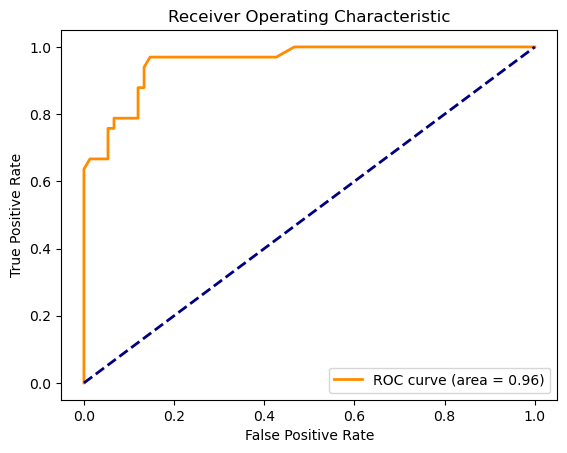

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import pandas as pd


data = pd.read_csv('/Users/mehtap/Downloads/PCOS_data.csv')


imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data.iloc[:, 3:-1])  
X = data_imputed
y = data['PCOS (Y/N)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = np.mean(y_test == y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

y_scores = rf_classifier.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_scores)
print("ROC AUC:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_scores)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


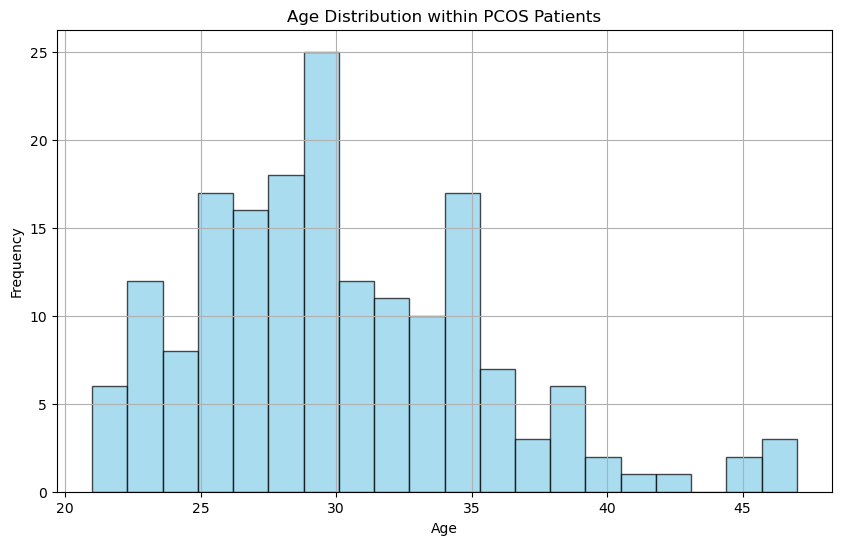

In [6]:
pcos_data = data[data['PCOS (Y/N)'] == 1]

plt.figure(figsize=(10, 6))
plt.hist(pcos_data.iloc[:, 3], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution within PCOS Patients')
plt.grid(True)
plt.show()


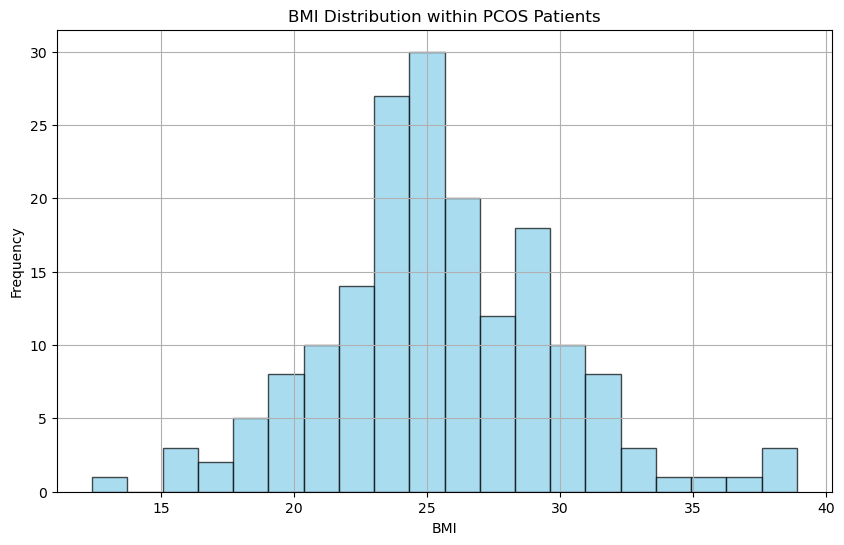

In [10]:
pcos_data = data[data['PCOS (Y/N)'] == 1]

plt.figure(figsize=(10, 6))
plt.hist(pcos_data.iloc[:, 6], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution within PCOS Patients')
plt.grid(True)
plt.show()


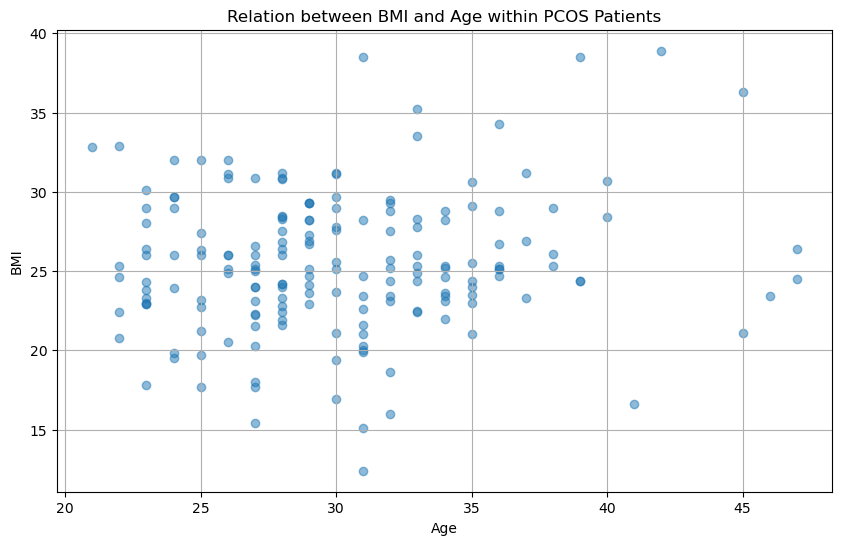

In [11]:
pcos_data = data[data['PCOS (Y/N)'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(pcos_data.iloc[:, 3], pcos_data.iloc[:, 6], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Relation between BMI and Age within PCOS Patients')
plt.grid(True)
plt.show()


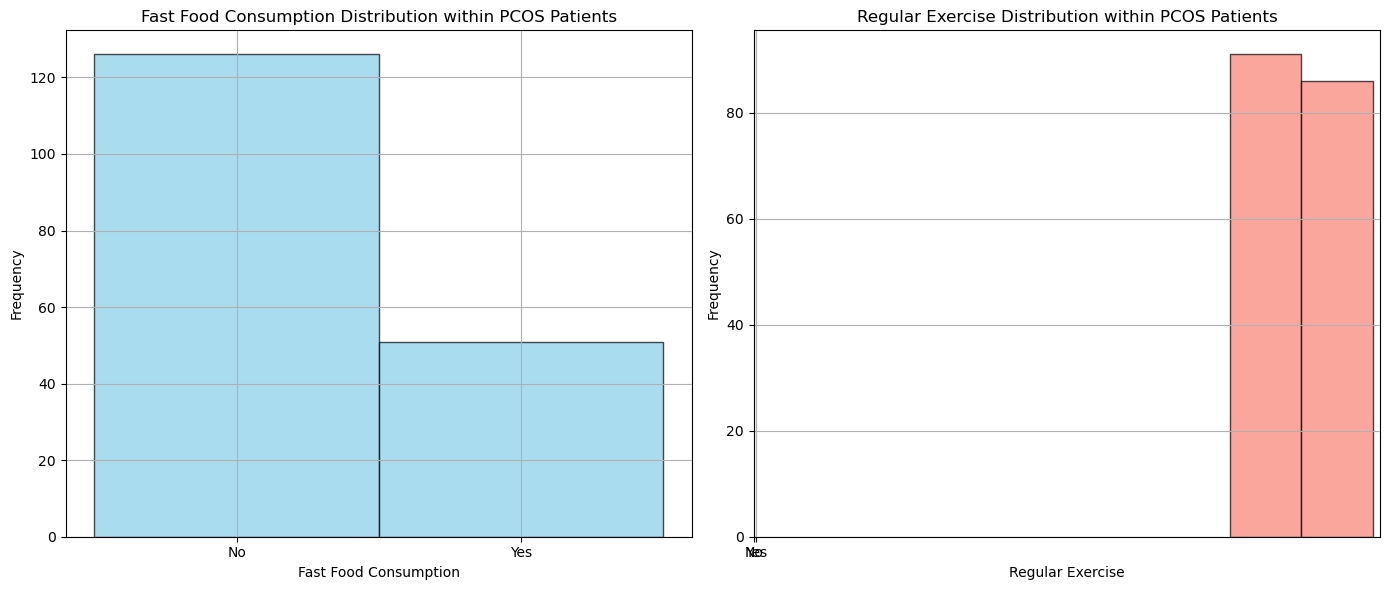

In [12]:
pcos_data = data[data['PCOS (Y/N)'] == 1]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(pcos_data.iloc[:, 36], bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Fast Food Consumption')
plt.ylabel('Frequency')
plt.title('Fast Food Consumption Distribution within PCOS Patients')
plt.xticks([0.25, 0.75], ['No', 'Yes'])  
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(pcos_data.iloc[:, 37], bins=2, color='salmon', edgecolor='black', alpha=0.7)
plt.xlabel('Regular Exercise')
plt.ylabel('Frequency')
plt.title('Regular Exercise Distribution within PCOS Patients')
plt.xticks([0.25, 0.75], ['No', 'Yes'])  
plt.grid(True)

plt.tight_layout()
plt.show()


Confusion Matrix:
[[71  4]
 [ 8 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        75
           1       0.86      0.76      0.81        33

    accuracy                           0.89       108
   macro avg       0.88      0.85      0.86       108
weighted avg       0.89      0.89      0.89       108

ROC AUC: 0.9561616161616162


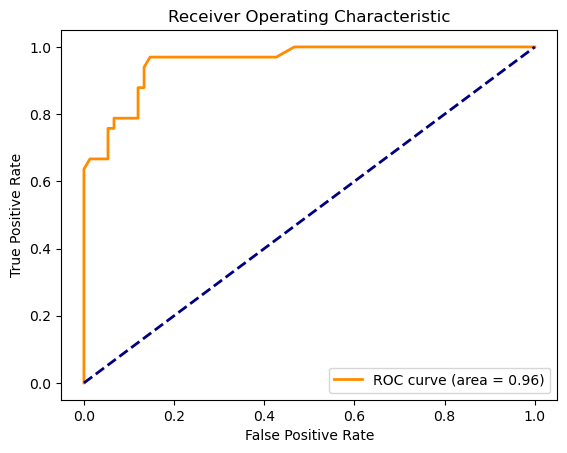

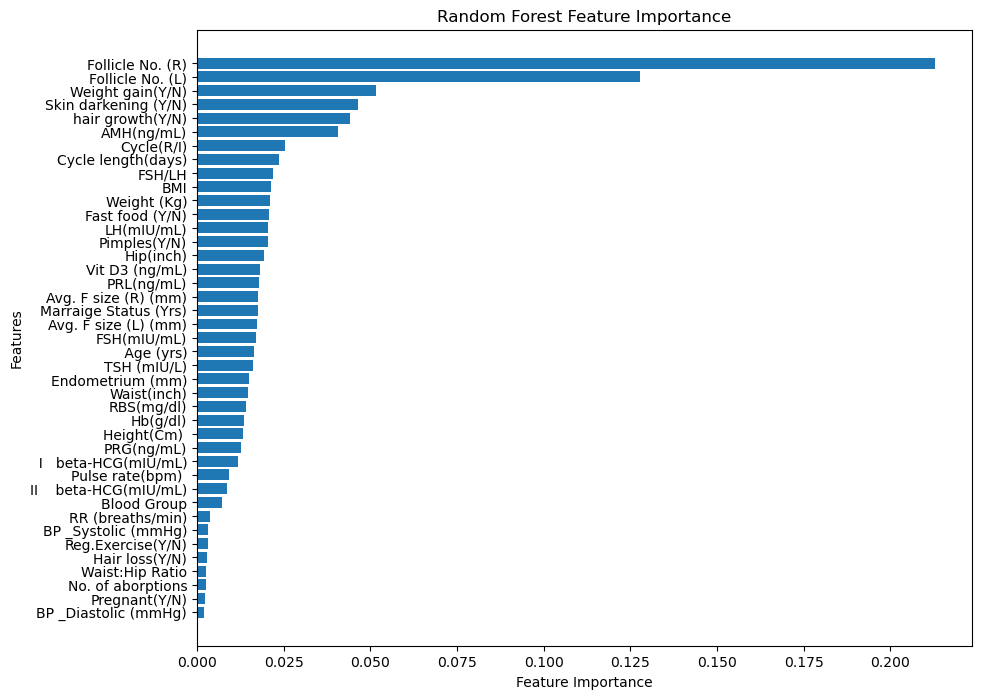

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import pandas as pd


data = pd.read_csv('/Users/mehtap/Downloads/PCOS_data.csv')

imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data.iloc[:, 3:-1])  # Impute missing values in the feature columns

X = data_imputed
y = data['PCOS (Y/N)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = np.mean(y_test == y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

y_scores = rf_classifier.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_scores)
print("ROC AUC:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_scores)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

feature_importance = rf_classifier.feature_importances_
feature_names = data.columns[3:-1]  # Assuming the features start from the 4th column and end before the last column
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()


 Age                      int64
Weight                  float64
Height                  float64
BMI                     float64
Blood Group               int64
Pulse rate                int64
RR                        int64
Hb                      float64
Cycle                     int64
Cycle length              int64
Marriage status         float64
Pregnant                  int64
No. of abortions          int64
  I   beta-HCG          float64
II    beta-HCG           object
FSH                     float64
LH                      float64
FSH/LH                  float64
Hip                       int64
Waist                     int64
Waist:Hip Ratio         float64
TSH                     float64
AMH                     float64
PRL                     float64
Vit D3                  float64
PRG                     float64
RBS                     float64
Weight gain               int64
Hair growth               int64
Skin darkening            int64
Hair loss                 int64
Pimples 

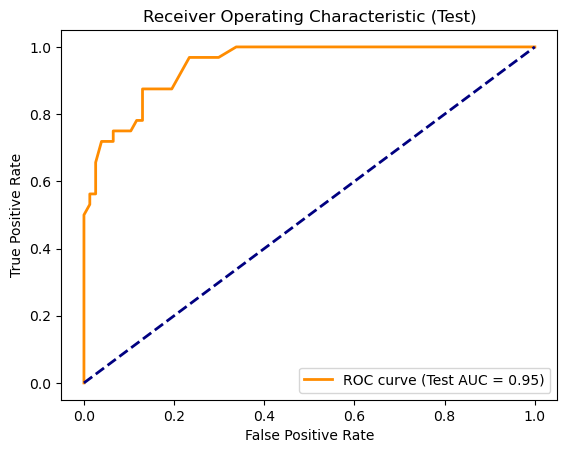

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import pandas as pd

# Load data
data = pd.read_excel('/Users/mehtap/Downloads/05.xlsx')

# Imputation for missing values (excluding non-numeric columns)
#imputer = SimpleImputer(strategy='mean')
#data_imputed = imputer.fit_transform(data.iloc[:, 3:-1])  # Adjust this based on your dataset structure

# Inspect datatypes to find non-numeric columns
print(data.dtypes)

# Convert columns to numeric (cleaning issues like '1.99.')
for col in data.columns[3:-1]:  # your feature columns
    data[col] = pd.to_numeric(data[col].astype(str).str.replace(',', '.').str.replace(r'[^\d\.\-]', '', regex=True), errors='coerce')

# After this, re-run imputation
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data.iloc[:, 3:-1])

# Features and target
X = data_imputed
y = data['PCOS']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# ---- TRAIN RESULTS ----
y_train_pred = rf_classifier.predict(X_train)
y_train_scores = rf_classifier.predict_proba(X_train)[:, 1]
roc_auc_train = roc_auc_score(y_train, y_train_scores)

print("TRAIN RESULTS")
print("------------------")
print("Confusion Matrix (Train):")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred))
print("ROC AUC (Train):", roc_auc_train)

# ---- TEST RESULTS ----
y_test_pred = rf_classifier.predict(X_test)
y_test_scores = rf_classifier.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_test_scores)

print("\nTEST RESULTS")
print("------------------")
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))
print("ROC AUC (Test):", roc_auc_test)

# ROC Curve for TEST
fpr, tpr, _ = roc_curve(y_test, y_test_scores)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (Test AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Test)')
plt.legend(loc="lower right")
plt.show()
